<a href="https://colab.research.google.com/github/diamondleng/In-situ-Gel-Project/blob/main/(Desicion_Tree)In_situ_Gel_Treatment_Supervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-situ Gel Treatment Prediction 

In this project, we use supervised learning models to identify when and where in-situ gel can be effective for conformance control. Furthermore, we will analyze top factors that influence the treatment result. [Dataset information](https://docs.google.com/spreadsheets/d/1xpFILBRuhmnOE3RRd39j9kSzb8eNWv7L/edit?usp=sharing&ouid=117836167977540402507&rtpof=true&sd=true).

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)

In [ ]:
import pandas as pd
df = pd.read_csv('Optimization_In-situ_Gel.csv')
df.head()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,SHEARTHIN,APV,Profile Reduction
0,0.002654,0.528298,26896.8,0.70,1589.29,206.0,251.188640,1683.089,0.362,1.0,0.799753
1,0.066667,2.103194,41716.0,0.90,1776.05,402.0,39.810717,588.143,0.527,1.0,0.760233
2,0.010566,8.372973,26896.8,0.75,2336.33,206.0,63.095734,1865.580,0.461,1.0,0.517429
3,0.006667,5.282988,41716.0,0.75,2336.33,10.0,630.957340,770.634,0.362,1.0,0.681005
4,0.042064,2.103194,63944.8,0.95,842.25,10.0,630.957340,1683.089,0.296,1.0,0.736294


# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
import pandas as pd
import numpy as np

ISG_df = pd.read_csv('In-situ_Gel_Optimization.csv')

In [ ]:
ISG_df.head()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,SHEARTHIN,APV,Profile Reduction
0,0.002654,0.528298,26896.8,0.70,1589.29,206.0,251.188640,1683.089,0.362,1.0,0.799753
1,0.066667,2.103194,41716.0,0.90,1776.05,402.0,39.810717,588.143,0.527,1.0,0.760233
2,0.010566,8.372973,26896.8,0.75,2336.33,206.0,63.095734,1865.580,0.461,1.0,0.517429
3,0.006667,5.282988,41716.0,0.75,2336.33,10.0,630.957340,770.634,0.362,1.0,0.681005
4,0.042064,2.103194,63944.8,0.95,842.25,10.0,630.957340,1683.089,0.296,1.0,0.736294


In [ ]:
lower, upper = 0.1, 2
l_norm = [lower + (upper - lower) * (x-1/3)/(1/0.03-1/3) for x in (ISG_df['Gelation Time'])]


In [ ]:
ISG_df['Gelation Time']=l_norm

ISG_df['Gelation Time']
print(max(ISG_df['Gelation Time']))


2.0000055656565654


In [ ]:
ISG_df.describe()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,SHEARTHIN,APV,Profile Reduction
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,222.000000
mean,0.016397,0.531232,29883.405989,0.830144,1782.907313,606.151710,242.071608,617.954592,0.393216,0.448177,0.510529
std,0.019566,0.569493,26629.114753,0.078491,587.179967,543.827987,239.486166,589.555106,0.103378,0.433813,0.353512
min,0.000667,0.100000,466.799090,0.700000,842.250000,10.000000,10.000000,10.000000,0.230000,0.003417,-0.495631
25%,0.001675,0.129016,4668.000000,0.750000,1215.770000,206.000000,59.000000,63.095734,0.296000,0.057748,0.111091
50%,0.006667,0.272728,23955.960000,0.825000,1776.050000,405.652000,158.489320,405.652000,0.395000,0.207440,0.594432
75%,0.026540,0.844854,49125.600000,0.900000,2336.330000,953.125000,398.107170,1000.000000,0.494000,1.000000,0.822604
max,0.066667,2.000006,78764.406000,0.950000,2709.850000,1865.580000,1000.000000,1865.580000,0.560000,1.000000,0.999896


In [ ]:
ISG_df['Gel Initiate Time(WC)']=1-ISG_df['Gel Initiate Time(WC)']
ISG_df['Gel Initiate Time(WC)']=ISG_df['Gel Initiate Time(WC)']*100
ISG_df['APV']=1-ISG_df['APV']
ISG_df['Oil Viscosity']=-ISG_df['Oil Viscosity']
ISG_df['Gelant Rate']=-ISG_df['Gelant Rate']
ISG_df['Profile Reduction']=ISG_df['Profile Reduction']*100


In [ ]:
ISG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Channel Width          237 non-null    float64
 1   Gelation Time          237 non-null    float64
 2   Frr                    237 non-null    float64
 3   Gel Initiate Time(WC)  237 non-null    float64
 4   Gelant Rate            237 non-null    float64
 5   K Ratio                237 non-null    float64
 6   Oil Viscosity          237 non-null    float64
 7   Gelant Viscosity       237 non-null    float64
 8   SHEARTHIN              237 non-null    float64
 9   APV                    237 non-null    float64
 10  Profile Reduction      222 non-null    float64
dtypes: float64(11)
memory usage: 20.5 KB


In [ ]:
ISG_df['Profile Reduction'].dropna(inplace=True)


In [ ]:
TreatmentResult=pd.Series(np.zeros(len(ISG_df['Profile Reduction'])))


In [ ]:
numReduction=ISG_df['Profile Reduction']
sum(numReduction>80)

66

In [ ]:

for i in range(len(numReduction)):
  if numReduction[i]<50:
    TreatmentResult[i]='Less Effective'
  else:
    TreatmentResult[i]='Very Effective'



In [ ]:
ISG_df['Treatment Result']=TreatmentResult


In [ ]:
# check data info
ISG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Channel Width          237 non-null    float64
 1   Gelation Time          237 non-null    float64
 2   Frr                    237 non-null    float64
 3   Gel Initiate Time(WC)  237 non-null    float64
 4   Gelant Rate            237 non-null    float64
 5   K Ratio                237 non-null    float64
 6   Oil Viscosity          237 non-null    float64
 7   Gelant Viscosity       237 non-null    float64
 8   SHEARTHIN              237 non-null    float64
 9   APV                    237 non-null    float64
 10  Profile Reduction      222 non-null    float64
 11  Treatment Result       237 non-null    object 
dtypes: float64(11), object(1)
memory usage: 22.3+ KB


In [ ]:
# check the number of unique values for each column
# 前两个变量基本没有意义因为全是unique value推不出pattern
ISG_df.nunique()


Channel Width             27
Gelation Time             27
Frr                       48
Gel Initiate Time(WC)     27
Gelant Rate               27
K Ratio                   38
Oil Viscosity             37
Gelant Viscosity          38
SHEARTHIN                 27
APV                       20
Profile Reduction        222
Treatment Result           2
dtype: int64

In [ ]:
# Get target variable
y = ISG_df['Profile Reduction']

### Part 1.2:  Understand the features

In [ ]:
# check missing values
ISG_df.isnull().sum()

Channel Width             0
Gelation Time             0
Frr                       0
Gel Initiate Time(WC)     0
Gelant Rate               0
K Ratio                   0
Oil Viscosity             0
Gelant Viscosity          0
SHEARTHIN                 0
APV                       0
Profile Reduction        15
Treatment Result          0
dtype: int64

In [ ]:
nanrow=ISG_df.isnull()
row_has_NaN = nanrow.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [ ]:
rows_with_NaN

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,SHEARTHIN,APV,Profile Reduction
5,0.004206,33.333430,41716.00000,0.900,2336.33,157.000,15.848932,1500.598000,0.527,1.000000,NaN
15,0.026540,33.333430,56535.20000,0.925,1776.05,10.000,158.489320,1865.580000,0.395,1.000000,NaN
27,0.016746,33.333430,41716.00000,0.800,2709.85,451.000,39.810717,953.125000,0.362,1.000000,NaN
85,0.010566,33.333430,41716.00000,0.800,2709.85,402.000,100.000000,1865.580000,0.362,1.000000,NaN
89,0.006667,33.333430,70934.28000,0.725,1215.77,108.000,39.810717,1683.089000,0.230,0.013222,NaN
90,0.042064,3.333339,47445.12000,0.800,2523.09,157.000,630.957340,770.634000,0.230,0.110100,NaN
94,0.026540,21.031968,78764.00000,0.875,1215.77,500.000,158.489320,1865.580000,0.428,0.003417,NaN
97,0.006667,13.270271,23955.96000,0.750,2149.57,304.000,1000.000000,1683.089000,0.263,0.013222,NaN
99,0.026540,8.372973,63104.56000,0.800,1776.05,59.000,63.095734,1500.598000,0.395,0.025121,NaN
101,0.001675,21.031968,39615.40000,0.750,1029.01,59.000,39.810717,953.125000,0.296,0.080549,NaN


In [ ]:
ISG_df.dropna(inplace=True)

In [ ]:
# understand Numerical feature
# discrete/continuous
ISG_2=ISG_df.round(2)
ISG_2.describe()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,SHEARTHIN,APV,Profile Reduction
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.016351,0.462838,28993.485090,16.894505,-1765.704189,620.206441,-244.368423,589.834369,0.397523,0.548063,51.052703
std,0.020879,0.501959,26489.213992,7.891915,585.957387,543.860283,237.448187,570.182333,0.103117,0.434826,35.351208
min,0.000000,0.100000,466.800000,5.000000,-2709.850000,10.000000,-1000.000000,10.000000,0.230000,0.000000,-49.560000
25%,0.000000,0.130000,4668.000000,10.000000,-2149.570000,223.160000,-398.110000,63.100000,0.300000,0.000000,11.110000
50%,0.010000,0.200000,19487.200000,17.385000,-1776.050000,405.650000,-183.795000,401.880000,0.400000,0.790000,59.440000
75%,0.030000,0.560000,49125.600000,24.375000,-1215.770000,953.120000,-59.000000,1000.000000,0.490000,0.940000,82.257500
max,0.070000,2.000000,78764.410000,30.000000,-842.250000,1865.580000,-10.000000,1865.580000,0.560000,1.000000,99.990000


In [ ]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

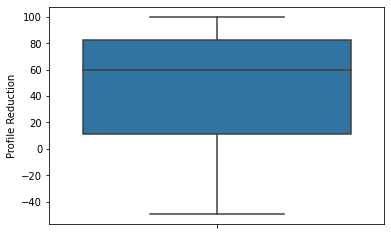

In [ ]:
sns.boxplot(y='Profile Reduction',data=ISG_df)

In [ ]:
ISG_df.rename(columns={'SHEARTHIN': 'Shear coeff'}, inplace=True)
ISG_df.rename(columns={'Gelation Time': 'Gelation Time'}, inplace=True)


In [ ]:
ISG_df.sort_values(by='Treatment Result',ascending=False,inplace=True)

In [ ]:
ISG_df.head()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,Shear coeff,APV,Profile Reduction,Treatment Result
0,0.002654,0.111225,26896.800,30.0,-1589.29,206.000,-251.188640,1683.089000,0.362,0.000000,79.975339,Very Effective
152,0.002654,0.562888,47163.932,25.0,-1029.01,223.161,-59.000000,63.095734,0.395,0.697919,85.411416,Very Effective
111,0.002654,0.157213,63104.560,25.0,-1589.29,500.000,-15.848932,1318.107000,0.527,0.960313,78.656482,Very Effective
112,0.066667,1.291740,31785.680,12.5,-1402.53,59.000,-10.000000,1135.616000,0.527,0.942252,88.611767,Very Effective
118,0.000667,0.844854,47445.120,15.0,-1215.77,59.000,-10.000000,405.652000,0.263,0.792560,80.172456,Very Effective


# Part 2: Feature Preprocessing

In [ ]:
ISG_df.head()


,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,Shear coeff,APV,Profile Reduction,Treatment Result
0,0.002654,0.111225,26896.800,30.0,-1589.29,206.000,-251.188640,1683.089000,0.362,0.000000,79.975339,Very Effective
152,0.002654,0.562888,47163.932,25.0,-1029.01,223.161,-59.000000,63.095734,0.395,0.697919,85.411416,Very Effective
111,0.002654,0.157213,63104.560,25.0,-1589.29,500.000,-15.848932,1318.107000,0.527,0.960313,78.656482,Very Effective
112,0.066667,1.291740,31785.680,12.5,-1402.53,59.000,-10.000000,1135.616000,0.527,0.942252,88.611767,Very Effective
118,0.000667,0.844854,47445.120,15.0,-1215.77,59.000,-10.000000,405.652000,0.263,0.792560,80.172456,Very Effective


In [ ]:
# Get feature space by dropping useless feature
to_drop = ['Profile Reduction','Treatment Result']
X = ISG_df.drop(to_drop, axis=1)

In [ ]:
X.head()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,Shear coeff,APV
0,0.002654,0.111225,26896.800,30.0,-1589.29,206.000,-251.188640,1683.089000,0.362,0.000000
152,0.002654,0.562888,47163.932,25.0,-1029.01,223.161,-59.000000,63.095734,0.395,0.697919
111,0.002654,0.157213,63104.560,25.0,-1589.29,500.000,-15.848932,1318.107000,0.527,0.960313
112,0.066667,1.291740,31785.680,12.5,-1402.53,59.000,-10.000000,1135.616000,0.527,0.942252
118,0.000667,0.844854,47445.120,15.0,-1215.77,59.000,-10.000000,405.652000,0.263,0.792560


In [ ]:
X.dtypes

Channel Width            float64
Gelation Time            float64
Frr                      float64
Gel Initiate Time(WC)    float64
Gelant Rate              float64
K Ratio                  float64
Oil Viscosity            float64
Gelant Viscosity         float64
Shear coeff              float64
APV                      float64
dtype: object

In [ ]:
cat_cols = X.columns[X.dtypes == 'O']#categorical type is 0
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
num_cols

Index(['Channel Width', 'Gelation Time', 'Frr', 'Gel Initiate Time(WC)',
       'Gelant Rate', 'K Ratio', 'Oil Viscosity', 'Gelant Viscosity',
       'Shear coeff', 'APV'],
      dtype='object')

In [ ]:
cat_cols

Index([], dtype='object')

#Split dataset
#应该先分数据，再进行preprocessing，因为testing set数据尽量不要动


In [ ]:
# Objective: y is Treatment Result
y=ISG_df['Treatment Result']

In [ ]:
y_reg=ISG_df['Profile Reduction']

In [ ]:
# Splite data into training and testing
# 100 -> 75:y=1, 25:y=0
# training(80): 60 y=1; 20 y=0 
# testing(20):  15 y=1; 5 y=0

from sklearn import model_selection

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state=1) #stratify = y :=> stratified sampling 分层抽样 根据y的分类进行分层然后随机抽样

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 177 observation with 10 features
test data has 45 observation with 10 features


* 10000 -> 8000 '0' + 2000 '1'

* 25% test 75% training 
---
without stratified sampling:
• extreme case:
---
1. testing: 2000 '1' + 500 '0'
2. training: 7500 '0'
---
with stratified sampling:
1. testing: 2000 '0' + 500 '1'
2. training: 6000 '0' + 1500 '1'


Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](http://contrib.scikit-learn.org/category_encoders/).

In [ ]:
X_train.head()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,Shear coeff,APV
159,0.026540,0.157213,78764.4060,30.0,-1215.77,1318.107,-402.0,15.848932,0.395,0.960313
190,0.042064,0.384980,10126.2820,17.5,-1402.53,588.143,-304.0,63.095734,0.494,0.850037
155,0.016746,0.111225,2174.1525,25.0,-1589.29,40.670,-500.0,10.000000,0.527,0.452503
65,0.001057,0.100000,63944.8000,22.5,-2336.33,59.000,-10.0,405.652000,0.362,0.000000
120,0.042064,0.111225,1301.8771,25.0,-2336.33,770.634,-255.0,100.000000,0.263,0.889900


In [ ]:
X_train.head()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,Shear coeff,APV
159,0.026540,0.157213,78764.4060,30.0,-1215.77,1318.107,-402.0,15.848932,0.395,0.960313
190,0.042064,0.384980,10126.2820,17.5,-1402.53,588.143,-304.0,63.095734,0.494,0.850037
155,0.016746,0.111225,2174.1525,25.0,-1589.29,40.670,-500.0,10.000000,0.527,0.452503
65,0.001057,0.100000,63944.8000,22.5,-2336.33,59.000,-10.0,405.652000,0.362,0.000000
120,0.042064,0.111225,1301.8771,25.0,-2336.33,770.634,-255.0,100.000000,0.263,0.889900


In [ ]:
X_train.head()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,Shear coeff,APV
159,0.026540,0.157213,78764.4060,30.0,-1215.77,1318.107,-402.0,15.848932,0.395,0.960313
190,0.042064,0.384980,10126.2820,17.5,-1402.53,588.143,-304.0,63.095734,0.494,0.850037
155,0.016746,0.111225,2174.1525,25.0,-1589.29,40.670,-500.0,10.000000,0.527,0.452503
65,0.001057,0.100000,63944.8000,22.5,-2336.33,59.000,-10.0,405.652000,0.362,0.000000
120,0.042064,0.111225,1301.8771,25.0,-2336.33,770.634,-255.0,100.000000,0.263,0.889900


Standardize/Normalize Data

In [ ]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6,100] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training

In [ ]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction of test data
classifier_logistic.predict(X_test)

array(['Very Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Less Effective', 'Very Effective', 'Very Effective',
       'Less Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Very Effective', 'Very Effective',
       'Less Effective', 'Very Effective', 'Less Effective',
       'Less Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Less Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Less Effective', 'Very Effective', 'Very Effective'], dtype=object)

In [ ]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8222222222222222

In [ ]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.80555556 0.91666667 0.65714286 0.82857143 0.91428571]
Model accuracy of Logistic Regression is 0.8244444444444445
[0.69444444 0.80555556 0.65714286 0.74285714 0.77142857]
Model accuracy of KNN is 0.7342857142857142
[0.80555556 0.88888889 0.65714286 0.91428571 0.77142857]
Model accuracy of Random Forest is 0.8074603174603174


### (Optional) Part 3.2: Use Grid Search to Find Optimal Hyperparameters
alternative: random search

In [ ]:
#Loss/cost function --> (wx + b - y) ^2 + ƛ * |w| --> ƛ is a hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.2, 1, 1.5, 2) #一般来说从0.1左右开始试
}

Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5) #有些算法solver不支持l1，需要查function detail
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.2, 1, 1.5, 2), 'penalty': ('l1', 'l2')})

In [ ]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8417460317460318
Best parameters set:
C:1
penalty:l1


In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [ ]:
best_LR_model.predict(X_test)

array(['Very Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Less Effective', 'Very Effective', 'Very Effective',
       'Less Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Very Effective', 'Very Effective',
       'Less Effective', 'Very Effective', 'Less Effective',
       'Less Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Less Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Less Effective', 'Very Effective', 'Very Effective'], dtype=object)

In [ ]:
best_LR_model.score(X_test, y_test)

0.8222222222222222

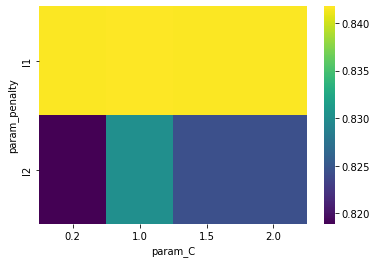

In [ ]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

Best case suggests 1.5 as hyperparameter


#### Part 3.2.2: Find Optimal Hyperparameters: KNN

In [ ]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [ ]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.7342857142857142
Best parameters set:
n_neighbors:5


Best case suggests 7

#调参目的是找到需要的model，不见得是最好的，能达到目的就行

In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [50,51,52,53,54,55,57],
    'max_depth': [3,4,5,6,7,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 10],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 57]})

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.819047619047619
Best parameters set:
max_depth:5
n_estimators:52


#最后发现10层深度，54个树model最佳

In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model

RandomForestClassifier(max_depth=5, n_estimators=52)

####Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled treatment result

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive treatment result divided by the total number of predictive result;
High Precision means low fp, not many return result were predicted as result. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or treatment result correctly. High recall means low fn, not many treatment result were predicted correctly.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print (cm)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
y_test

30     Very Effective
184    Very Effective
192    Less Effective
9      Very Effective
177    Very Effective
58     Very Effective
92     Very Effective
186    Less Effective
183    Less Effective
130    Less Effective
17     Very Effective
77     Very Effective
209    Less Effective
22     Very Effective
52     Very Effective
123    Very Effective
128    Less Effective
79     Very Effective
8      Very Effective
46     Very Effective
153    Very Effective
203    Less Effective
40     Very Effective
181    Less Effective
220    Less Effective
227    Less Effective
206    Less Effective
156    Less Effective
234    Very Effective
225    Less Effective
86     Very Effective
211    Less Effective
223    Very Effective
42     Very Effective
35     Less Effective
1      Very Effective
78     Less Effective
48     Less Effective
216    Very Effective
111    Very Effective
164    Less Effective
168    Very Effective
166    Less Effective
71     Very Effective
53     Very Effective
Name: Trea

In [ ]:
best_RF_model.predict(X_test)

array(['Very Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Less Effective', 'Very Effective', 'Very Effective',
       'Less Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Very Effective', 'Very Effective',
       'Less Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Very Effective', 'Less Effective',
       'Less Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Less Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Less Effective', 'Very Effective', 'Very Effective'], dtype=object)

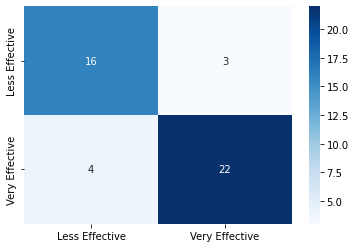

Random Forest
Accuracy is: 0.8444444444444444
precision is: 0.88
recall is: 0.8461538461538461
[[16  3]
 [ 4 22]]
Logistic Regression
Accuracy is: 0.8222222222222222
precision is: 0.9090909090909091
recall is: 0.7692307692307693
[[17  2]
 [ 6 20]]
K nearest neighbor
Accuracy is: 0.7777777777777778
precision is: 0.8076923076923077
recall is: 0.8076923076923077
[[14  5]
 [ 5 21]]


In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]
crf=confusion_matrix(y_test,best_RF_model.predict(X_test))
ytick=best_RF_model.predict(X_test)
sns.heatmap(crf,cmap='Blues',xticklabels=['Less Effective','Very Effective'],
            yticklabels=['Less Effective','Very Effective'],annot=True, fmt="d")
plt.show()
draw_confusion_matrices(confusion_matrices)


In [ ]:
best_RF_model.predict(X_train)


array(['Very Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Very Effective', 'Very Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Very Effective', 'Less Effective',
       'Less Effective', 'Very Effective', 'Very Effective',
       'Less Effective', 'Very Effective', 'Very Effective',
       'Very Effective', 'Very Effective', 'Very Effective',
       'Less Effective', 'Less Effective', 'Very Effective',
       'Less Effective', 'Very Effective', 'Less Effective',
       'Less Effective', 'Very Effective', 'Less Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Very Effective', 'Less Effective', 'Very Effective',
       'Less Effective', 'Less Effective', 'Less Effective',
       'Very Effective', 'Very Effective', 'Very Effective',
       'Very Effective', 'Very Effective', 'Less Effective',
       'Less Effective',

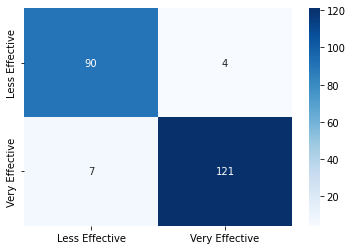

In [ ]:
#Test for the whole data set
crf_train=confusion_matrix(y_train,best_RF_model.predict(X_train))
crf_test=confusion_matrix(y_test,best_RF_model.predict(X_test))
crf_all=crf_train+crf_test
sns.heatmap(crf_all,cmap='Blues',xticklabels=['Less Effective','Very Effective'],
            yticklabels=['Less Effective','Very Effective'],annot=True, fmt="d")
plt.show()

# Part 4: Model Extra Functionality

### Part 4.1:  Logistic Regression Model

The corelated features that we are interested in

### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [ ]:
X_RF = X.copy()

#X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
#X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,Channel Width,Gelation Time,Frr,Gel Initiate Time(WC),Gelant Rate,K Ratio,Oil Viscosity,Gelant Viscosity,Shear coeff,APV
0,0.002654,0.111225,26896.800,30.0,-1589.29,206.000,-251.188640,1683.089000,0.362,0.000000
152,0.002654,0.562888,47163.932,25.0,-1029.01,223.161,-59.000000,63.095734,0.395,0.697919
111,0.002654,0.157213,63104.560,25.0,-1589.29,500.000,-15.848932,1318.107000,0.527,0.960313
112,0.066667,1.291740,31785.680,12.5,-1402.53,59.000,-10.000000,1135.616000,0.527,0.942252
118,0.000667,0.844854,47445.120,15.0,-1215.77,59.000,-10.000000,405.652000,0.263,0.792560


In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)
bar_x=[]
bar_y=[]
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))
  bar_x.append(round(importances[indices[ind]], 4))
  bar_y.append(X_RF.columns[indices[ind]])

Feature importance ranking by Random Forest Model:
Frr : 0.3718
Channel Width : 0.0882
Gelation Time : 0.088
Gelant Viscosity : 0.0798
K Ratio : 0.0768
Oil Viscosity : 0.0719
APV : 0.0696
Gel Initiate Time(WC) : 0.0535
Gelant Rate : 0.0521
Shear coeff : 0.0482


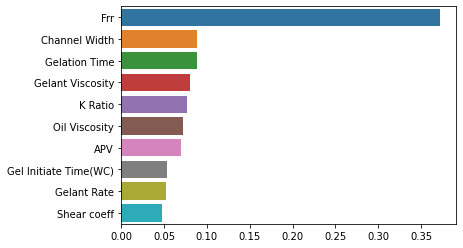

In [ ]:
sns.barplot(x=bar_x,y=bar_y,orient='h')

#importance 仅对该RF model的相对重要性，只是提供参考

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
y_pred = clf.predict(X)

In [ ]:

print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 1.0


In [ ]:
bar_x=[]
bar_y=[]
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))
  bar_x.append(round(importances[indices[ind]], 4))
  bar_y.append(X.columns[indices[ind]])

Feature importance ranking by Random Forest Model:
Frr : 0.5127
Channel Width : 0.1535
Oil Viscosity : 0.0814
Gelation Time : 0.071
Gelant Viscosity : 0.0515
APV : 0.0443
Gelant Rate : 0.0283
Gel Initiate Time(WC) : 0.0213
Shear coeff : 0.0201
K Ratio : 0.0159


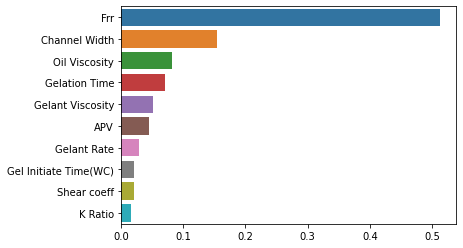

In [ ]:
sns.barplot(x=bar_x,y=bar_y,orient='h')

In [ ]:
!pip install graphviz

!pip install pydotplus

!pip install sklearn

!pip install six

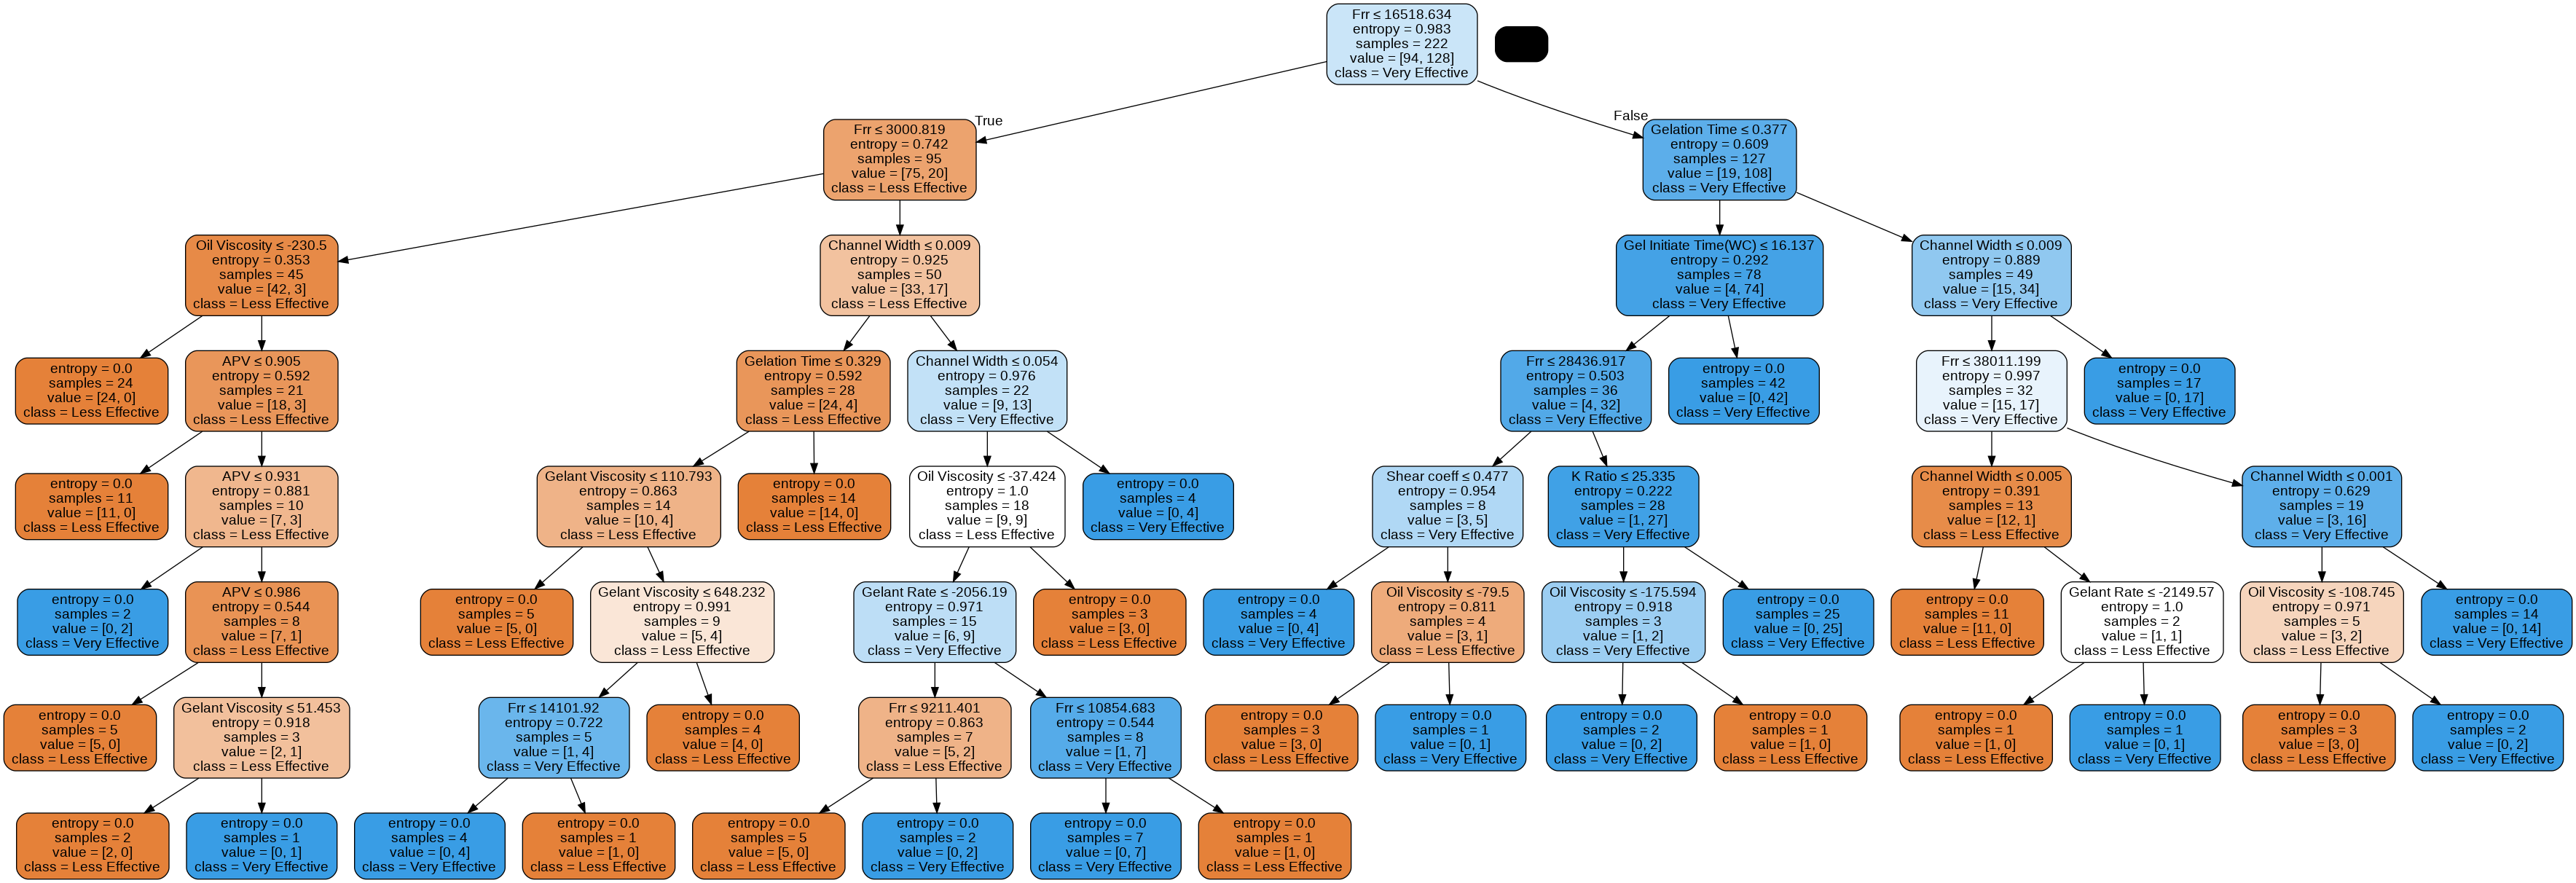

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
cols_names=X.columns
dot_data = StringIO()
class_name=np.unique(y)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols_names,class_names=class_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
#Regression

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_reg, test_size=0.2, random_state=1) 

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression

# Logistic Regression
classifier_linear = LinearRegression()
# Train the model
classifier_linear.fit(X_train, y_train)

training data has 177 observation with 10 features
test data has 45 observation with 10 features


LinearRegression()

In [ ]:
y_predict=classifier_linear.predict(X_test)

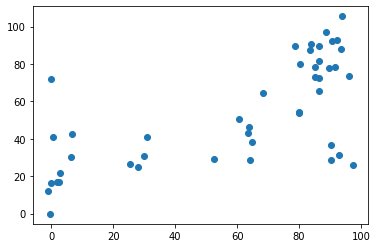

In [ ]:
plt.scatter(y_test,y_predict)

In [ ]:

bar_x=[]
bar_y=[]
importances = classifier_linear.coef_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))
  bar_x.append(round(importances[indices[ind]], 4))
  bar_y.append(X.columns[indices[ind]])

Feature importance ranking by Random Forest Model:
Frr : 23.694
Channel Width : 5.9225
K Ratio : 4.0355
Oil Viscosity : 2.8494
Gelant Viscosity : 1.3756
Gel Initiate Time(WC) : 0.7004
Gelant Rate : 0.4558
Shear coeff : -0.683
APV : -3.7239
Gelation Time : -6.1706


In [ ]:
def show_values_on_bars(axs, h_v="v", space=1):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

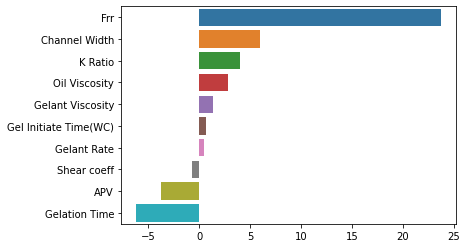

In [ ]:

sns_t=sns.barplot(x=bar_x,y=bar_y,orient='h')

